In [142]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Import Data

In [2]:
sales = pd.read_csv('/Users/galvanize/Desktop/final_project/summer-products-with-rating-and-performance_2020-08.csv')

In [ ]:
unique_tag = pd.read_csv('/Users/galvanize/Desktop/final_project/unique-categories_tags.csv')

In [ ]:
tag_count = pd.read_csv('/Users/galvanize/Desktop/final_project/unique-categories.sorted-by-count.csv')

# Review data

In [3]:
sales.describe()
#sales.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [ ]:
# see we have some nulls

In [4]:
sales.isnull().sum()[sales.isnull().sum() !=0]

rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

In [11]:
#For the ratings I don't want to get rid of the rows and the nulls are important information.  I will replace with 0
# rating features
sales['rating_five_count'].replace(np.nan, 0, inplace=True)
sales['rating_four_count'].replace(np.nan, 0, inplace=True)
sales['rating_three_count'].replace(np.nan, 0, inplace=True)
sales['rating_two_count'].replace(np.nan, 0, inplace=True)
sales['rating_one_count'].replace(np.nan, 0, inplace=True)
sales['merchant_profile_picture'].replace(np.nan, 0, inplace=True)
sales['has_urgency_banner'].replace(np.nan, 0, inplace=True)
sales['product_color'].replace(np.nan, 0, inplace=True)
sales['urgency_text'].replace(np.nan, 0, inplace=True)

In [12]:
sales.info()
#sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1573 non-null   float64
 10  rating_four_count             1573 non-null   float64
 11  rating_three_count            1573 non-null   float64
 12  rating_two_count              1573 non-null   float64
 13  rat

In [7]:
sales.head(1)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08


In [8]:
sales.dtypes[sales.dtypes == 'int']

retail_price                    int64
units_sold                      int64
uses_ad_boosts                  int64
rating_count                    int64
badges_count                    int64
badge_local_product             int64
badge_product_quality           int64
badge_fast_shipping             int64
product_variation_inventory     int64
shipping_option_price           int64
shipping_is_express             int64
countries_shipped_to            int64
inventory_total                 int64
merchant_rating_count           int64
merchant_has_profile_picture    int64
dtype: object

In [9]:
sales.dtypes[sales.dtypes == 'object']

title                        object
title_orig                   object
currency_buyer               object
tags                         object
product_color                object
product_variation_size_id    object
shipping_option_name         object
urgency_text                 object
origin_country               object
merchant_title               object
merchant_name                object
merchant_info_subtitle       object
merchant_id                  object
merchant_profile_picture     object
product_url                  object
product_picture              object
product_id                   object
theme                        object
crawl_month                  object
dtype: object

In [194]:
sales.dtypes[sales.dtypes == 'float']

price                 float64
rating                float64
rating_five_count     float64
rating_four_count     float64
rating_three_count    float64
rating_two_count      float64
rating_one_count      float64
has_urgency_banner    float64
merchant_rating       float64
gross                 float64
dtype: object

In [13]:
#Checked all the above to see if they have useful information

sales.merchant_info_subtitle.unique()

array(['(568 notes)', '83 % avis positifs (17,752 notes)',
       '86 % avis positifs (295 notes)', ..., '(4,080 notes)',
       '86 % avis positifs (210 notes)',
       '90 % avis positifs (7,023 notes)'], dtype=object)

In [14]:
sales.urgency_text.unique()

array(['Quantité limitée !', 0, 'Réduction sur les achats en gros'],
      dtype=object)

In [17]:
sales['urgency_text'].value_counts()

0                                  1100
Limited_quantity!                   472
Discount_on_wholesale_purchases       1
Name: urgency_text, dtype: int64

In [16]:
#Change the wording to english for urgency text
sales['urgency_text'] = sales['urgency_text'].replace({'Quantité limitée !':'Limited_quantity!', 'Réduction sur les achats en gros':'Discount_on_wholesale_purchases'})

In [ ]:
#change product color to all lower case

In [18]:
sales['product_color']=sales['product_color'].str.lower()

In [ ]:
# create new columns for gross 

In [19]:
sales['gross'] = sales['price']*sales['units_sold']


In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1573 non-null   float64
 10  rating_four_count             1573 non-null   float64
 11  rating_three_count            1573 non-null   float64
 12  rating_two_count              1573 non-null   float64
 13  rat

In [21]:
# Change the product color to be more sycronized

In [22]:
sales['product_color'].value_counts()

black             305
white             257
yellow            105
pink              101
blue              100
                 ... 
black & stripe      1
brown & yellow      1
rose red            1
prussianblue        1
star                1
Name: product_color, Length: 95, dtype: int64

In [23]:
#moved out to correct column in excel
sales.to_csv('/Users/galvanize/Desktop/final_project/revised_summer-products-with-rating-and-performance_2020-08.csv', index = False)


In [115]:
sales_rev = pd.read_csv('/Users/galvanize/Desktop/final_project/rev_summer-products-with-rating-and-performance_2020-08.csv')

In [116]:
sales_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1572 non-null   object 
 1   title_orig                    1572 non-null   object 
 2   price                         1572 non-null   float64
 3   retail_price                  1572 non-null   int64  
 4   change_bw_retail_price        1572 non-null   float64
 5   change_in_price               1572 non-null   float64
 6   currency_buyer                1572 non-null   object 
 7   units_sold                    1572 non-null   int64  
 8   uses_ad_boosts                1572 non-null   int64  
 9   rating                        1572 non-null   float64
 10  rating_count                  1572 non-null   int64  
 11  rating_five_count             1572 non-null   int64  
 12  rating_four_count             1572 non-null   int64  
 13  rat

In [127]:
sales_rev['product_variation_size_id']=sales_rev['product_variation_size_id'].str.upper()
sales_rev['product_variation_size_id']=sales_rev['product_variation_size_id'].replace(np.nan, 'Other')


In [119]:
sales_rev['origin_country'] = sales_rev['origin_country'].replace(np.nan, 'Other')
sales_rev['origin_country'] = sales_rev['origin_country'].replace('VE', 'Other')
sales_rev['origin_country'] = sales_rev['origin_country'].replace('SG', 'Other')
sales_rev['origin_country'] = sales_rev['origin_country'].replace('AT', 'Other')
sales_rev['origin_country'] = sales_rev['origin_country'].replace('GB', 'Other')

In [ ]:
# visuals to Analyize the data


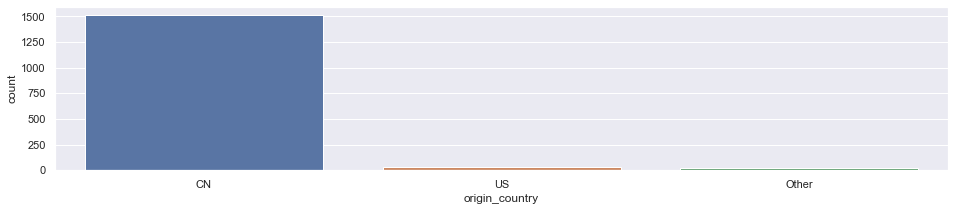

In [120]:
sns.countplot('origin_country',
              data = sales_rev)

In [40]:
sales_rev.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'Tags', 'Tags1', 'Tags2', 'Tags3', 'Tags4', 'Tags5', 'Tags6', 'Tags7',
       'Tags8', 'Tags9', 'Tags10', 'Tags11', 'Tags12', 'Tags13', 'Tags14',
       'Tags15', 'Tags16', 'Tags17', 'Tags18', 'Tags19', 'Tags20', 'Tags21',
       'Tags22', 'Tags23', 'Tags24', 'Tags25', 'Tags26', 'Tags27', 'Tags28',
       'Tags29', 'Tags30', 'Tags31', 'Tags32', 'Tags33', 'Tags34', 'Tags35',
       'Tags36', 'Tags37', 'Tags38', 'Tags39', 'Tags40', 'Total_num_ tags',
       'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_t

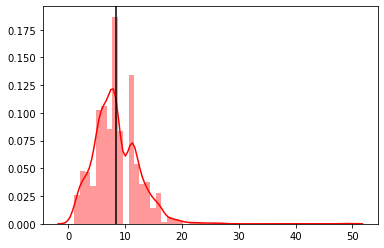

In [42]:
x = sales_rev['price'].values

# Calculating the mean
mean = sales_rev['price'].mean()

sns.distplot(x, color='red')

# plotting the mean

plt.axvline(mean,0, 1, color = 'black')

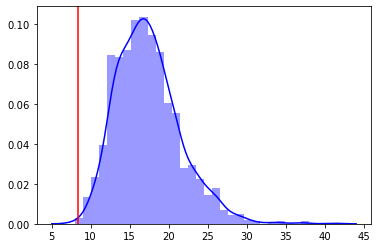

In [49]:
y = sales_rev['Total_num_ tags'].values

# Calculating the mean
mean1 = sales_rev['Total_num_ tags'].mean()

sns.distplot(y, color='blue')

# plotting the mean

plt.axvline(mean,0, 1, color = 'red')

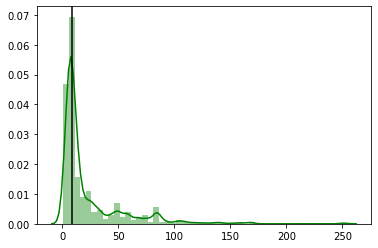

In [50]:
z= sales_rev['retail_price'].values

# Calculating the mean
mean1 = sales_rev['retail_price'].mean()

sns.distplot(z, color='green')

# plotting the mean

plt.axvline(mean,0, 1, color = 'black')


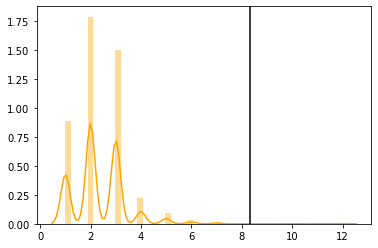

In [51]:
g= sales_rev['shipping_option_price'].values

# Calculating the mean
mean1 = sales_rev['shipping_option_price'].mean()

sns.distplot(g, color='orange')

# plotting the mean

plt.axvline(mean,0, 1, color = 'black')


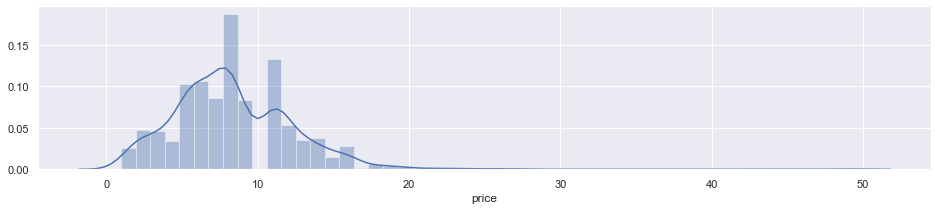

In [102]:
bs= sns.distplot(sales_rev.price)

In [77]:
sales_rev['product_variation_size_id'].value_counts()

S       1072
XS       213
M        114
XXS       59
L         35
XL         9
2XL        7
4XL        6
XXXS       4
5XL        3
3XL        1
6XL        1
Name: product_variation_size_id, dtype: int64

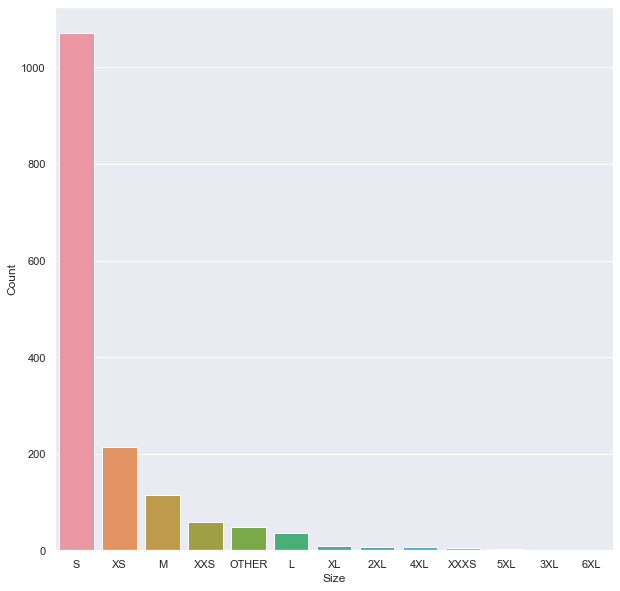

In [129]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = sales_rev['product_variation_size_id'].value_counts().index,
              data = sales_rev,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()
#most products are size S 

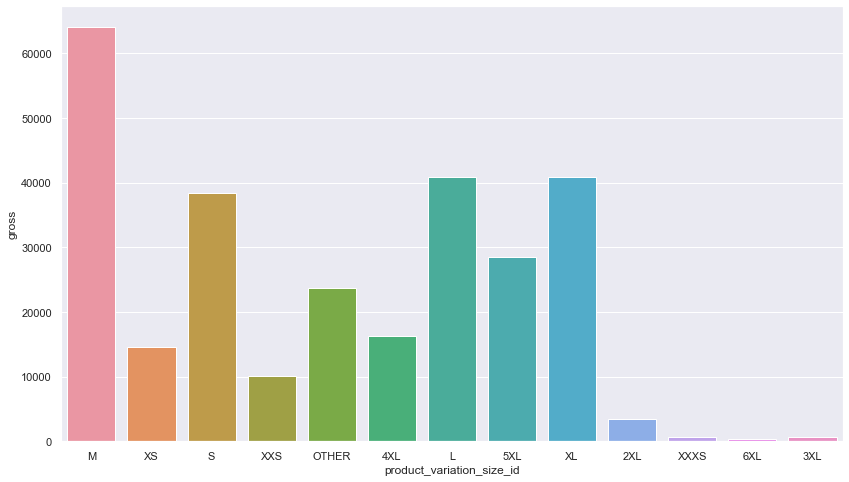

In [166]:
sns.set(rc={'figure.figsize': (14, 8)})
gg = sns.barplot(x = 'product_variation_size_id', y = 'gross', data=sales_rev, ci=False)

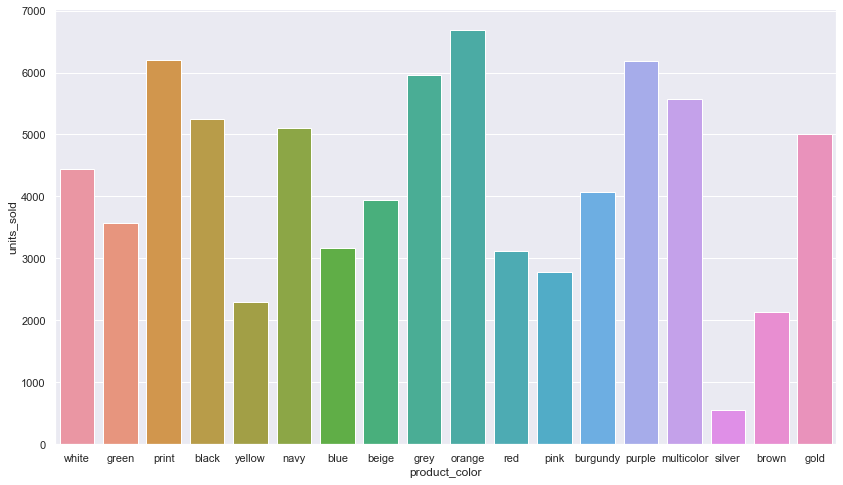

In [168]:
sns.barplot(x = 'product_color', y = 'units_sold', data = sales_rev, ci=False)
 

[Text(17.200000000000003, 0.5, 'Count'),
 Text(0.5, 17.200000000000003, 'Product Color')]

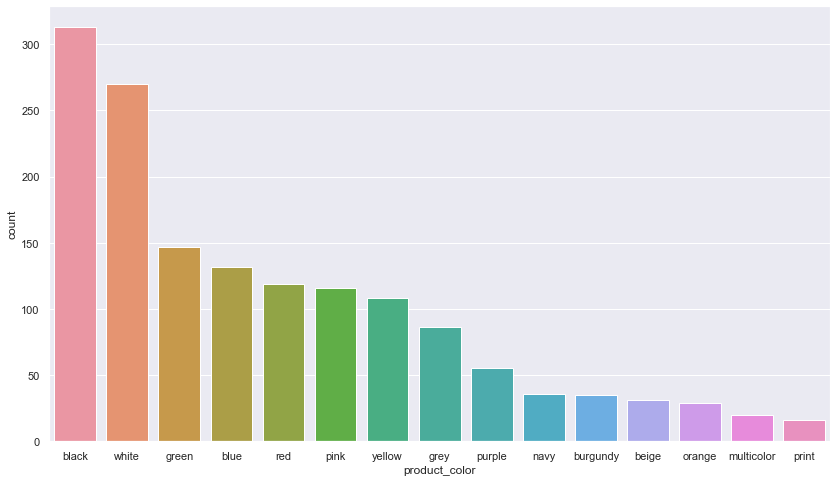

In [130]:
sns.countplot('product_color',
              data = sales_rev,
              order = sales_rev['product_color'].value_counts().iloc[:15].index)
ax.set(xlabel='Product Color', ylabel='Count')

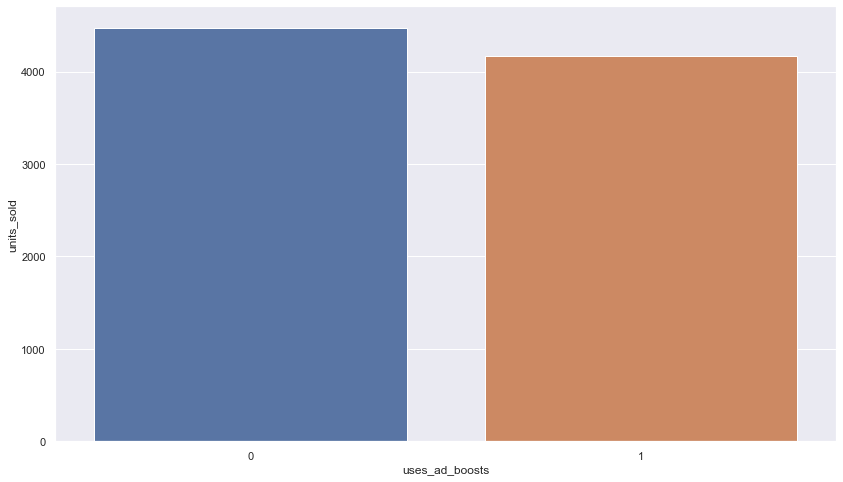

In [137]:
aa = sns.barplot(x = 'uses_ad_boosts', y = 'units_sold',data=sales_rev, ci= False)
#most of the units sold don't use ad boost

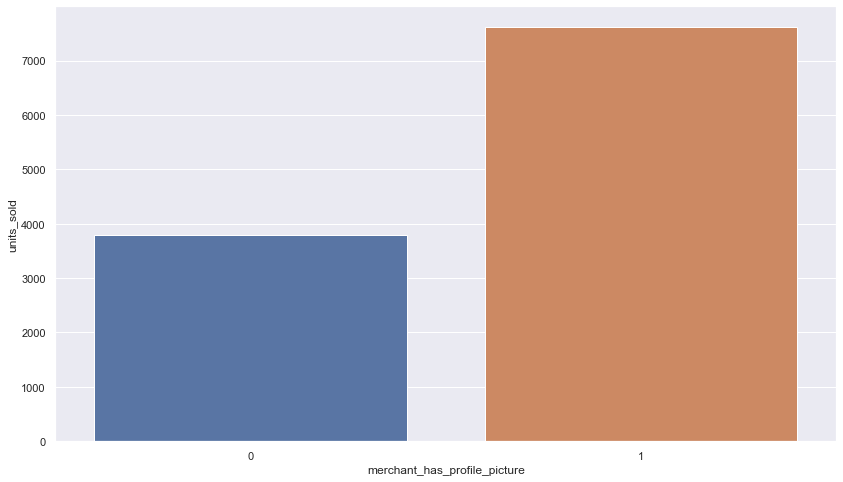

In [188]:
af = sns.barplot(x = 'merchant_has_profile_picture', y = 'units_sold',data=sales_rev, ci= False)
#most merchant has logo or photo on their profile

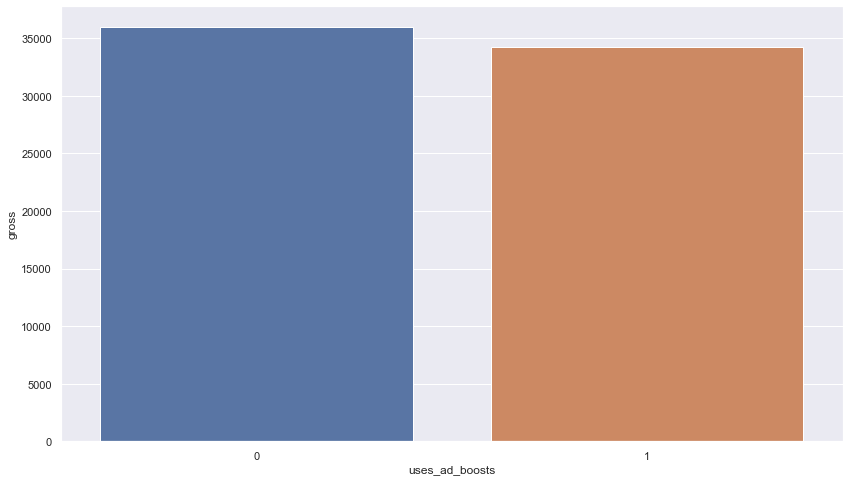

In [138]:
aa = sns.barplot(x = 'uses_ad_boosts', y = 'gross',data=sales_rev, ci= False)
#most of the money made was from items that didn't use add bost

In [189]:
sales_rev['merchant_id'].value_counts()

558c2cdc89d53c4005ea2920    15
5acaf29d5ebcfd72403106a8    12
583138b06339b410ab9663ec     9
5533c83986ff95173dc017d0     8
564d8a9ac0f55a1276cd96f8     8
                            ..
5ae6dab8b125ab6825502d06     1
5ad02d61ccf0c866db06b8c9     1
5b4d6eb88a5b7b24519e69ad     1
58475ecf5eee8869e4ad9a07     1
5dc69ae4c4e6e61846dfc2b4     1
Name: merchant_id, Length: 957, dtype: int64

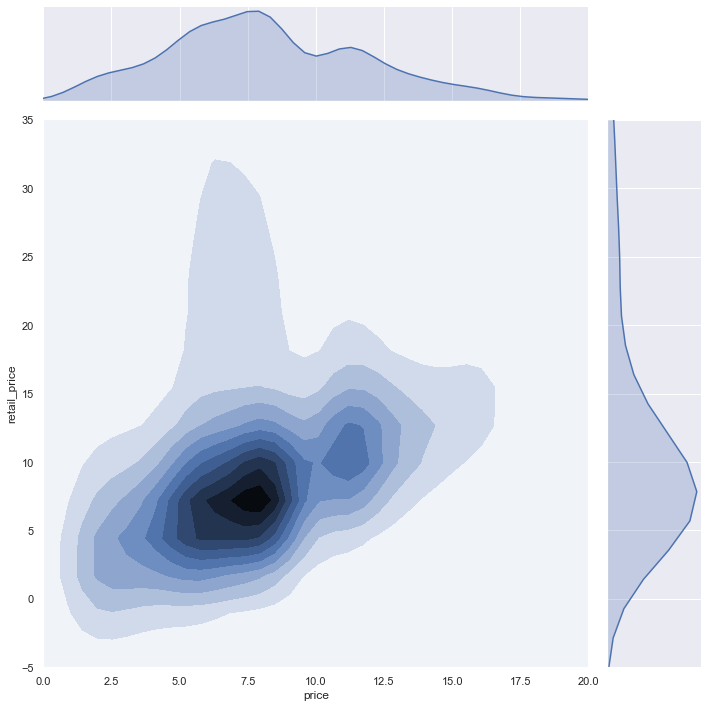

In [193]:
sns.jointplot(x='price', y='retail_price', data=sales_rev, kind='kde', xlim=(0,20), ylim=(-5,35), height=10)
plt.show()

In [ ]:
#which merchant had the most units sold
da =sns.scatterplot(x = 'rating' , y = 'gross', data = sales_rev, color = 'green', marker = "p")

In [93]:
sns.set(rc={'figure.figsize': (16,3)})

In [107]:
sales_rev['price'].value_counts()

8.00     282
11.00    201
7.00     129
9.00     126
6.00     120
12.00     81
5.00      80
14.00     57
13.00     54
16.00     42
2.00      38
3.00      23
15.00     22
4.00      18
5.65      15
18.00      9
5.66       7
5.77       7
1.72       6
5.83       6
5.84       6
5.79       6
19.00      6
4.81       5
1.68       5
5.78       5
2.71       5
5.74       5
1.00       5
2.72       4
3.70       4
2.66       4
2.81       4
4.67       4
3.83       4
20.00      4
3.66       4
5.69       4
5.85       4
5.86       4
5.81       3
4.93       3
5.90       3
2.89       3
22.00      3
3.76       3
5.80       3
3.85       3
2.80       3
5.73       3
3.92       3
3.69       3
5.87       3
3.67       3
4.66       3
3.71       3
5.75       3
4.83       3
3.87       3
3.88       3
5.71       3
5.89       3
5.67       3
3.81       3
3.86       3
1.75       2
3.73       2
1.80       2
3.94       2
17.00      2
4.90       2
1.86       2
1.65       2
1.85       2
3.68       2
2.65       2
3.65       2

In [106]:
pd.set_option('display.max_rows', 500)

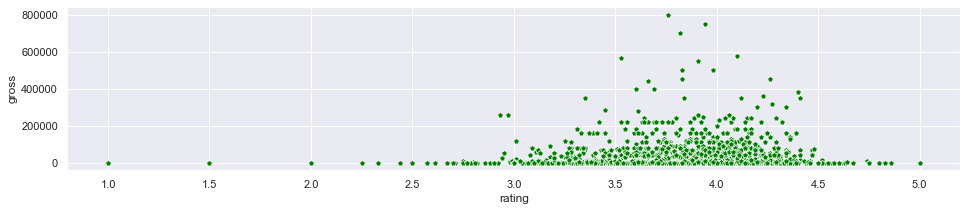

In [101]:
ba =sns.scatterplot(x = 'rating' , y = 'gross', data = sales_rev, color = 'green', marker = "p")

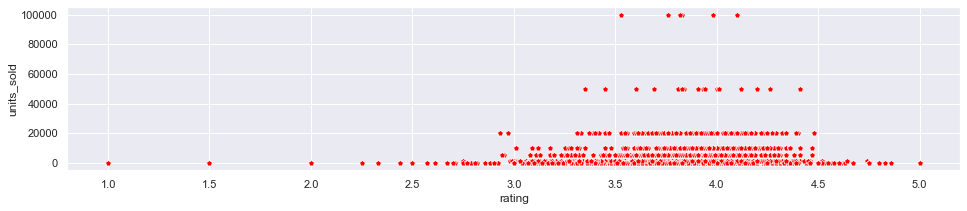

In [96]:
bb =sns.scatterplot(x = 'rating' , y = 'units_sold', data = sales_rev, color = 'red', marker = "p")

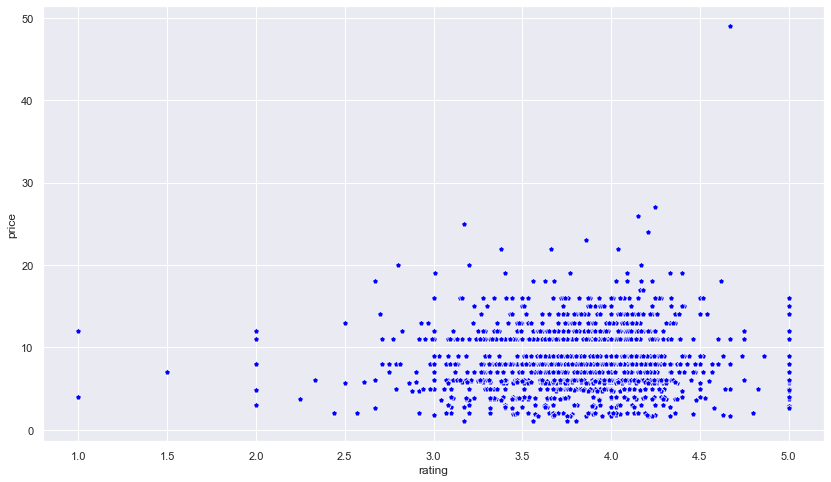

In [181]:
bc =sns.scatterplot(x = 'rating' , y = 'price', data = sales_rev, color = 'blue', marker = "p")

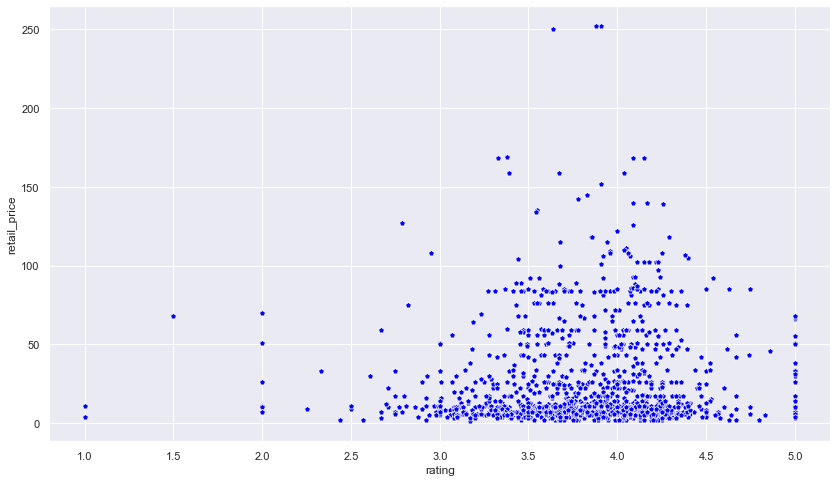

In [186]:
bd =sns.scatterplot(x = 'rating' , y = 'retail_price', data = sales_rev, color = 'blue', marker = "p")

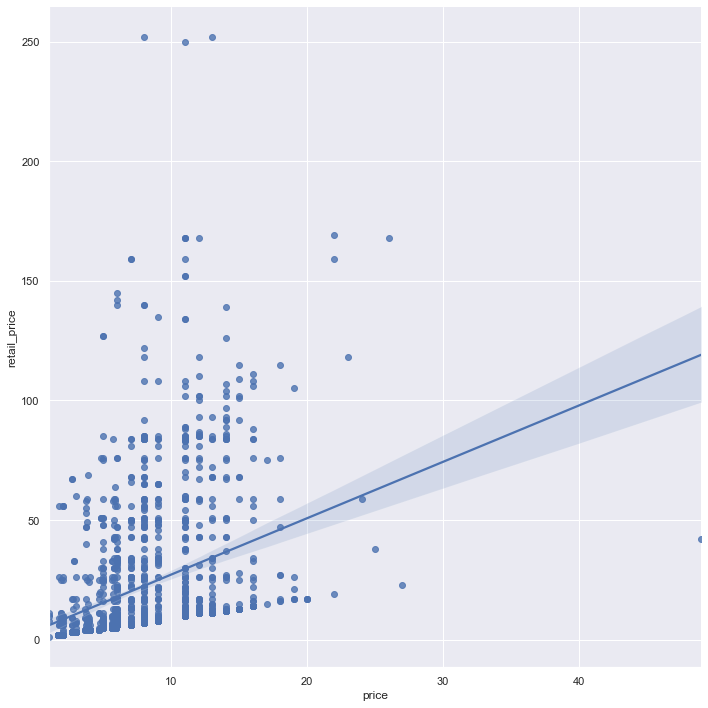

In [187]:
#bd =sns.scatterplot(x = 'price' , y = 'retail_price', data = sales_rev, color = 'black', marker = "p")
bf = sns.lmplot(x = "price", y = "retail_price", data = sales_rev, height = 10, aspect = 1)


In [113]:
sales_rev.shipping_option_price.value_counts()
#do some buy charts

2     619
3     519
1     308
4      76
5      32
6      12
7       5
12      1
Name: shipping_option_price, dtype: int64

[Text(17.200000000000003, 0.5, 'Count'),
 Text(0.5, 17.200000000000003, 'shipping_option_price')]

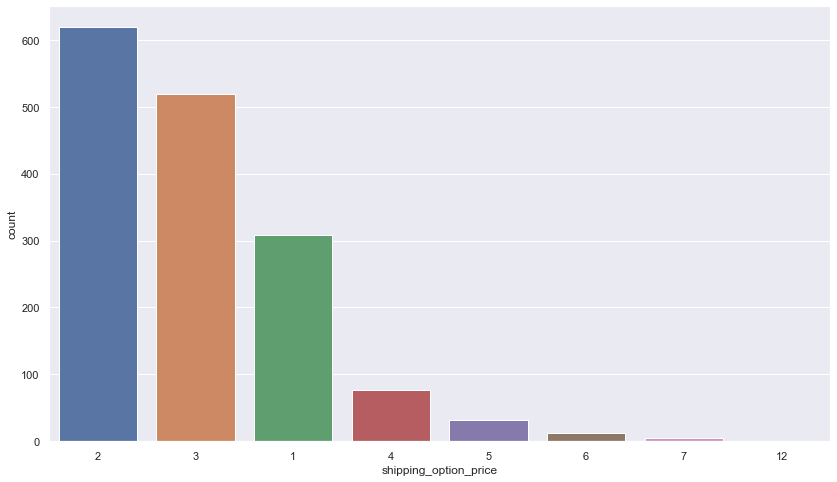

In [172]:
sns.countplot('shipping_option_price',
              data = sales_rev,
              order = sales_rev['shipping_option_price'].value_counts().iloc[:15].index)
ax.set(xlabel='shipping_option_price', ylabel='Count')

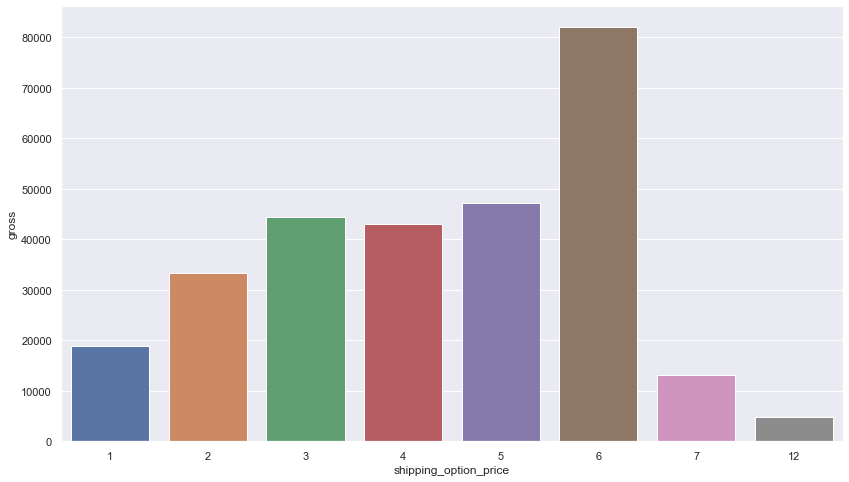

In [170]:
cc = sns.barplot(x = 'shipping_option_price', y = 'gross',data=sales_rev, ci= False)


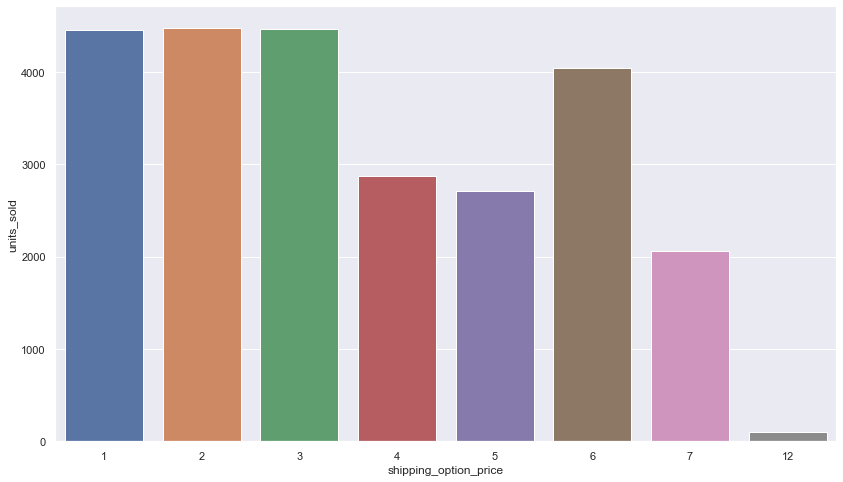

In [171]:
cc = sns.barplot(x = 'shipping_option_price', y = 'units_sold',data=sales_rev, ci= False)
